# 在极度不平衡模型中找到欺诈客户

In [1]:
import numpy as np
import pandas as pd

In [3]:
dataset=pd.read_csv('C:/daily/data.csv')
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#观察样本分布，发现极度不平衡
dataset['Class'].value_counts()


0    284315
1       492
Name: Class, dtype: int64

<function matplotlib.pyplot.show>

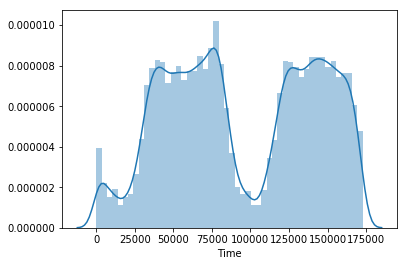

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.distplot(dataset['Time'].dropna())
plt.show

<function matplotlib.pyplot.show>

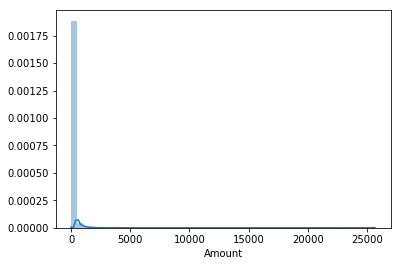

In [8]:
sns.distplot(dataset['Amount'].dropna())
plt.show

In [9]:
#进行对数转换
dataset['Amount'] = np.log(dataset['Amount'] + 1)
dataset['Time'] = np.log(dataset['Time'] + 1)

<function matplotlib.pyplot.show>

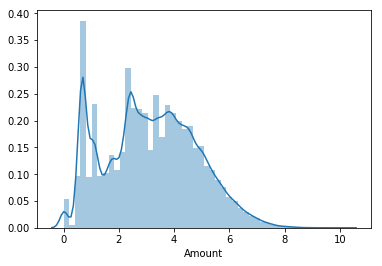

In [10]:
#重新观察分布
sns.distplot(dataset['Amount'].dropna())
plt.show

<function matplotlib.pyplot.show>

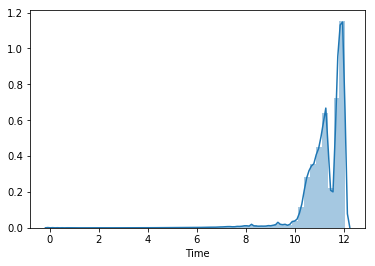

In [12]:
sns.distplot(dataset['Time'].dropna())
plt.show

In [15]:
#切分数据集
from sklearn.model_selection import train_test_split as sp

normal=dataset[dataset['Class']==0]
abnormal=dataset[dataset['Class']==1]

train,test=sp(normal,test_size=0.2)
normal_valid,normal_test=sp(test,test_size=0.5)
abnormal_valid,abnormal_test=sp(abnormal,test_size=0.5)

train=train.reset_index(drop=True)
valid=pd.concat([normal_valid,abnormal_test])
test=test.reset_index(drop=True)


In [18]:
#计算均值和协方差
from scipy.stats import multivariate_normal
mu=train.drop('Class',axis=1).mean(axis=0).values
sigma=train.drop('Class',axis=1).cov().values
model=multivariate_normal(cov=sigma,mean=mu,allow_singular=True)


In [20]:
#计算不同阈值下的召回率，精确度和F2   F2值为0.736
from sklearn.metrics import recall_score,precision_score,fbeta_score
threshods=np.linspace(-1000,-10,150)
scores=[]
for threshod in threshods:
    y_valid_lable=(model.logpdf(valid.drop('Class',axis=1))<threshod).astype(int)
    scores.append([recall_score(valid['Class'],y_valid_lable),\
                   precision_score(valid['Class'],y_valid_lable),\
                   fbeta_score(valid['Class'],y_valid_lable,beta=2)])
scores=np.array(scores)
print(scores[:,2].max(),scores[:,2].argmax())

0.736800630418 111
